In [27]:
import glob
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 9000)

## Import price of electricity per hour

Here we import data for the cost of electricity on the day ahead market from multiple CSV files. We join the dataframes, and remove certain rows which are not useful for our purposes of comparing electricity cost to demand.

In [28]:
csv_files = glob.glob('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/data/raw/electricity_price/csv_price/*.csv') # assume the path
appended_df = []
for csv in csv_files:
#     out = excel.split('.')[0]+'.csv'
    df = pd.read_csv(csv, skiprows=[0,25,26,27,28,29,30]) # if only the first sheet is needed.
    df = df.drop('CET/CEST time', axis=1)
    df = pd.melt(df, id_vars='UK time', value_vars=df.columns[1:])
    appended_df.append(df)
#     print(df)
    



The data is appended, and cleaned, replacing '-' with ':', placing full stops '.' instead of ',', and joining variables.

In [29]:
appended_data = pd.concat(appended_df, axis=0)
appended_data['UK time'] = appended_data['UK time'].str.replace('-',':')
appended_data['value'] = appended_data['value'].str.replace(',','.')
appended_data['datetime'] = appended_data[['variable', 'UK time']].apply(lambda x: ' '.join(x), axis=1)
appended_data = appended_data.drop(appended_data.columns[[0,1]], axis=1)
appended_data['datetime'] = appended_data['datetime'].str.replace('\xa0','')
appended_data = appended_data[~appended_data.datetime.str.contains("UK time")]

appended_data1 = appended_data.sort_values(by=['datetime'], ascending=True)

appended_data1

,value,datetime
93,47.14,01/01/2018 00:01
94,54.60,01/01/2018 01:02
95,46.63,01/01/2018 02:03
96,39.90,01/01/2018 03:04
97,23.41,01/01/2018 04:05
98,23.61,01/01/2018 05:06
99,29.96,01/01/2018 06:07
100,24.09,01/01/2018 07:08
101,24.14,01/01/2018 08:09
102,42.00,01/01/2018 09:10


Data transformed into date time, and sorted by datetime.

In [30]:
appended_data2 = appended_data1.copy()

appended_data2.datetime = pd.to_datetime(appended_data1['datetime'], format='%d/%m/%Y %H:%M')
appended_data2['value'] = pd.to_numeric(appended_data2['value'])

appended_data2['value'] = appended_data2['value'].apply(pd.to_numeric, errors='coerce')
appended_data2 = appended_data2.sort_values(by=['datetime'], ascending=True)
print(appended_data2.head())

     value            datetime
162  48.93 2017-12-21 00:01:00
163  47.47 2017-12-21 01:02:00
164  46.54 2017-12-21 02:03:00
165  46.09 2017-12-21 03:04:00
166  46.01 2017-12-21 04:05:00


Plotting data to see how it looks in the time domain.

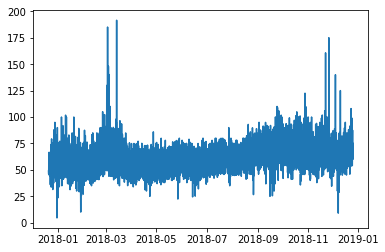

In [31]:
# plt.plot(appended_data2['datetime'], appended_data2['value'])
plt.plot(appended_data2['datetime'], appended_data2['value'])

We can see some large deviations in price, let's remove these outliers.

In [33]:
appended_data3 = appended_data2.copy()
appended_data3['cost_difference'] = appended_data3.value.diff().abs()
appended_data3.sort_values(by=['cost_difference'], ascending=False)

,value,datetime,cost_difference
134,191.55,2018-03-13 18:19:00,100.35
135,114.00,2018-03-13 19:20:00,77.55
20,112.52,2018-03-02 19:20:00,72.58
157,140.16,2018-03-04 18:19:00,70.17
40,151.21,2018-11-22 16:17:00,62.21
19,185.10,2018-03-02 18:19:00,60.10
180,148.00,2018-03-03 18:19:00,57.26
67,122.54,2018-10-28 17:18:00,52.54
132,127.37,2018-12-04 16:17:00,48.38
134,91.80,2018-12-04 18:19:00,48.20


There seems to be no groups after a difference of 50

In [34]:
cut_data = appended_data3[appended_data3.cost_difference<40]

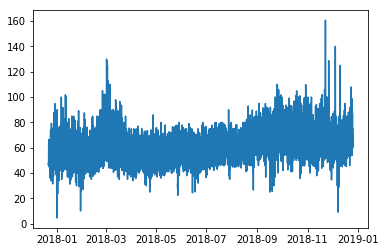

In [35]:
plt.plot(cut_data.datetime, cut_data.value)

The time in the datetime column do not seem to be precisely at each hour mark. For example, we have 14:02 rather than 14:00. Let's see if we can round to the nearest hour.

In [37]:
cut_data.datetime = cut_data.datetime.dt.round("H")
cut_data.head()

,value,datetime,cost_difference
163,47.47,2017-12-21 01:00:00,1.46
164,46.54,2017-12-21 02:00:00,0.93
165,46.09,2017-12-21 03:00:00,0.45
166,46.01,2017-12-21 04:00:00,0.08
167,49.67,2017-12-21 05:00:00,3.66


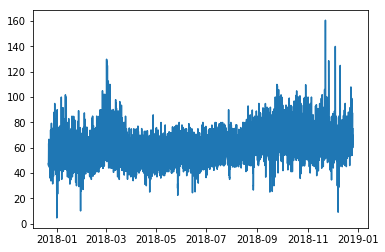

In [38]:
plt.plot(cut_data.datetime, cut_data.value)

Let's now join
